<a href="https://colab.research.google.com/github/Shakibap/Data-Science-Portfo/blob/Data-Science/Customer_Response_final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting the Response**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

In [324]:
#from google.colab import files
#files.upload()

In [268]:
data = pd.read_csv('marketing_campaign.csv', sep='\t', index_col='ID')

In [269]:
data.shape

(2240, 28)

In [270]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# **Data Cleaning**

In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

In [272]:
data.Dt_Customer = pd.to_datetime(data.Dt_Customer)

In [273]:
df = data.copy()

**finding the outliers**

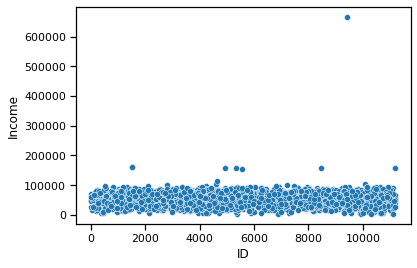

In [274]:
sns.set_context("notebook")
sns.scatterplot(data=df, x='ID', y='Income')

In [275]:
df.Income.idxmax()

9432

In [276]:
#removing the outlier data point
df.drop(index=9432, inplace=True)

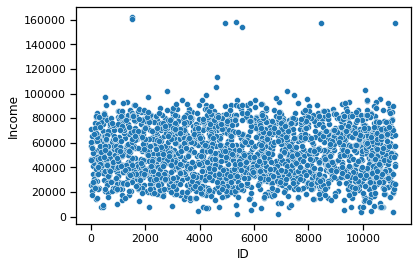

In [277]:
sns.scatterplot(x=df.index, y= df.Income)

In [278]:
highIncome_indexes = list(df[df.Income>120000].index)

In [279]:
df.drop(index=highIncome_indexes, inplace=True)

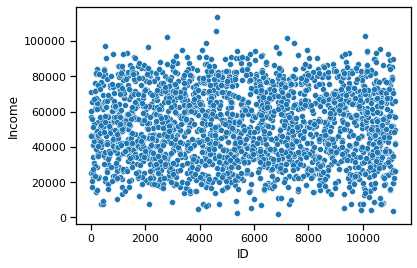

In [280]:
sns.scatterplot(x=df.index, y= df.Income)

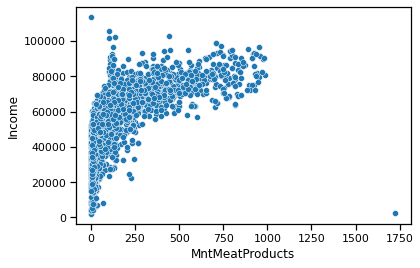

In [281]:
sns.scatterplot(x=df.MntMeatProducts, y= df.Income)

In [282]:
df[df.MntMeatProducts>1500]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5376,1979,Graduation,Married,2447.0,1,0,2013-06-01,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0
8720,1978,2n Cycle,Together,NaN,0,0,2012-12-08,53,32,2,1607,12,4,22,0,0,0,1,0,0,1,0,0,0,0,3,11,0


In [283]:
df.drop(index=[5376, 8720], inplace=True)

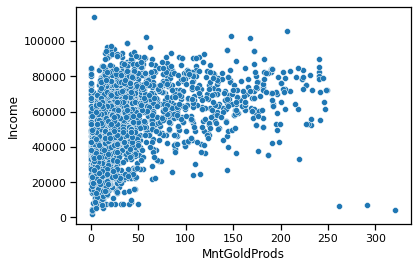

In [284]:
sns.scatterplot(x=df.MntGoldProds, y= df.Income)

In [285]:
df[df.MntGoldProds>250]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
4246,1982,Master,Single,6560.0,0,0,2013-12-12,2,67,11,26,4,3,262,0,1,0,1,17,0,0,0,0,0,0,3,11,0
6237,1966,PhD,Single,7144.0,0,2,2013-07-12,92,81,4,33,5,2,291,0,23,1,1,0,0,0,0,0,0,0,3,11,0
10311,1969,Graduation,Married,4428.0,0,1,2013-05-10,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,3,11,0


In [286]:
df.drop(index=[5255, 4246, 6237, 10311], inplace=True)

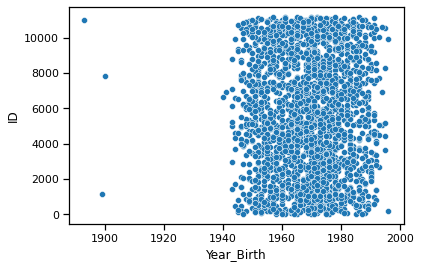

In [287]:
sns.scatterplot(x=df.Year_Birth, y=df.index)

In [288]:
df[df["Year_Birth"] < 1920]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0


In [289]:
#removing the outlier data point
df.drop(index=[7829, 11004, 1150] , inplace=True)

**concatenating the similar features**

In [290]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

*Divorced, Widow and Alone are considered as Single*

*Together and Married are considered as Couple* 

In [291]:
df[df.Marital_Status.isin(['Alone'])]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
433,1958,Master,Alone,61331.0,1,1,2013-10-03,42,534,5,47,0,5,41,5,11,1,6,8,0,0,0,0,0,0,3,11,0
7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,0,3,11,1
92,1988,Graduation,Alone,34176.0,1,0,2014-12-05,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,3,11,0


In [292]:
df.Marital_Status.replace('Alone' , 'Single', inplace=True)

In [293]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Absurd',
       'YOLO'], dtype=object)

In [294]:
df[df.Marital_Status.isin(['YOLO', 'Absurd'])]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,3,11,1
4369,1957,Master,Absurd,65487.0,0,0,2014-10-01,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0
492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,0
11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1


In [295]:
#removing outliers
df.drop(index=[7734, 4369, 492, 11133] , inplace=True)

# **Data Preprocessing**

In [296]:
y_full = df.Response
X_full = df.drop('Response', axis=1)

In [297]:
X_full.loc[:, 'Dt_Customer'] = pd.to_datetime(X_full['Dt_Customer'])
X_full.loc[:, 'Dt_Customer'] = X_full.Dt_Customer.astype('int')

In [298]:
X, X_valid, y, y_valid = train_test_split(X_full, y_full, test_size=0.4, random_state=42)

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [300]:
X_train.isnull().sum(), X_test.isnull().sum(), X_valid.isnull().sum()

(Year_Birth              0
 Education               0
 Marital_Status          0
 Income                 10
 Kidhome                 0
 Teenhome                0
 Dt_Customer             0
 Recency                 0
 MntWines                0
 MntFruits               0
 MntMeatProducts         0
 MntFishProducts         0
 MntSweetProducts        0
 MntGoldProds            0
 NumDealsPurchases       0
 NumWebPurchases         0
 NumCatalogPurchases     0
 NumStorePurchases       0
 NumWebVisitsMonth       0
 AcceptedCmp3            0
 AcceptedCmp4            0
 AcceptedCmp5            0
 AcceptedCmp1            0
 AcceptedCmp2            0
 Complain                0
 Z_CostContact           0
 Z_Revenue               0
 dtype: int64, Year_Birth             0
 Education              0
 Marital_Status         0
 Income                 4
 Kidhome                0
 Teenhome               0
 Dt_Customer            0
 Recency                0
 MntWines               0
 MntFruits             

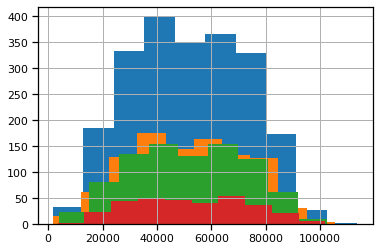

In [301]:
X_full.Income.hist()
X_train.Income.hist()
X_valid.Income.hist()
X_test.Income.hist()

In [302]:
#imputing missing values
imputer = SimpleImputer()

X_train_imputed = X_train.copy()
X_test_imputed = X_test.copy()
X_valid_imputed = X_valid.copy()

X_train_imputed.loc[:, 'Income'] = imputer.fit_transform(X_train[['Income']])
X_test_imputed.loc[:, 'Income'] = imputer.transform(X_test[['Income']])
X_valid_imputed.loc[:, 'Income'] = imputer.transform(X_valid[['Income']])

X_train = X_train_imputed.copy()
X_test = X_test_imputed.copy()
X_valid = X_valid_imputed.copy()

In [303]:
#encoding categorical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_valid = pd.get_dummies(X_valid)

In [304]:
#finding the percent of 1 in label
y_full.sum()/y_full.shape[0]

0.14961694456962596

*the labels are in two categories, 0 and 1. because the number of 1 is in minority (about 15%), the **f1_score** is the **evaluation metric**.*

# **Modelling**

# *Testing the models and choosing the potential classifiers*

In [305]:
x_train = X_train.copy()
x_test = X_test.copy()

Random Forest Classifier


In [306]:
#fitting data to the model
model = RandomForestClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       286
           1       0.73      0.23      0.35        47

    accuracy                           0.88       333
   macro avg       0.81      0.61      0.64       333
weighted avg       0.87      0.88      0.85       333



AdaBoost Classifier

In [307]:
model = AdaBoostClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       286
           1       0.65      0.43      0.51        47

    accuracy                           0.89       333
   macro avg       0.78      0.69      0.72       333
weighted avg       0.87      0.89      0.88       333



Gradient Boosting Classifier

In [308]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       286
           1       0.69      0.38      0.49        47

    accuracy                           0.89       333
   macro avg       0.80      0.68      0.72       333
weighted avg       0.88      0.89      0.87       333



XGB Classifier

In [309]:
model = XGBClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       286
           1       0.84      0.34      0.48        47

    accuracy                           0.90       333
   macro avg       0.87      0.66      0.71       333
weighted avg       0.89      0.90      0.88       333



KNeighbors Classifier

In [310]:
scaler = MinMaxScaler()

x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled.loc[:] = scaler.fit_transform(x_train)
x_test_scaled.loc[:] = scaler.transform(x_test)

In [311]:
model = KNeighborsClassifier()
model.fit(x_train_scaled, y_train)
predictions = model.predict(x_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       286
           1       0.58      0.30      0.39        47

    accuracy                           0.87       333
   macro avg       0.74      0.63      0.66       333
weighted avg       0.85      0.87      0.85       333



Support Vector Classifier

In [312]:
model = SVC()
model.fit(x_train_scaled, y_train)
predictions = model.predict(x_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       286
           1       0.71      0.26      0.37        47

    accuracy                           0.88       333
   macro avg       0.80      0.62      0.65       333
weighted avg       0.86      0.88      0.85       333



*classifiers with higher f1_score are selected as potential classifiers*

# Tuning the Hyperparameters and Validating the Models

In [313]:
x_valid = X_valid.copy()

In [314]:
x_train['Response'] = y_train
x_test['Response'] = y_test

X = pd.concat([x_train, x_test], axis=0)

In [315]:
y = X.Response
x = X.drop(columns='Response')

In [316]:
model = AdaBoostClassifier(learning_rate=0.68)
model.fit(x, y)
predictions = model.predict(x_valid)
print(classification_report(y_valid, predictions))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       756
           1       0.88      0.50      0.64       132

    accuracy                           0.92       888
   macro avg       0.90      0.74      0.79       888
weighted avg       0.91      0.92      0.91       888



In [317]:
model = GradientBoostingClassifier(learning_rate=0.51, n_estimators=200)
model.fit(x, y)
predictions = model.predict(x_valid)
print(classification_report(y_valid, predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       756
           1       0.72      0.58      0.64       132

    accuracy                           0.90       888
   macro avg       0.82      0.77      0.79       888
weighted avg       0.90      0.90      0.90       888



In [318]:
model = XGBClassifier(learning_rate=0.99, n_estimators=100)
model.fit(x, y)
predictions = model.predict(x_valid)
print(classification_report(y_valid, predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       756
           1       0.73      0.63      0.67       132

    accuracy                           0.91       888
   macro avg       0.83      0.79      0.81       888
weighted avg       0.91      0.91      0.91       888



# **Final Model**

In [320]:
x['Response'] = y
x_valid['Response'] = y_valid

In [321]:
X_Total = pd.concat([x, x_valid], axis=0)

In [322]:
y_Total = X_Total['Response']
X_Total.drop('Response', axis=1, inplace=True)

In [323]:
final_model = XGBClassifier(learning_rate=0.99, n_estimators=100)
model.fit(X_Total, y_Total)

XGBClassifier(learning_rate=0.99)